In [22]:
import sys
sys.path.append('..')

import networkx as nx
import numpy as np

from src.models import common_neighbor_community as cnc
from src.data import random_graph as rg
from src.features import read_graph as read

r_seed = 123

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def getMaxIntersectAccuracy(communities: list, predictions: list):
    max_intersection = dict()
    for com in communities:
        max_intersection[com] = 0.0
        
        for pred in predictions:
            intersection = len(communities[com].intersection(pred))
            max_intersection[com] = max(max_intersection[com], intersection)
            
        # get accuracy
        max_intersection[com] = max_intersection[com] / len(communities[com])
    
    return max_intersection

## Big Gap Graph

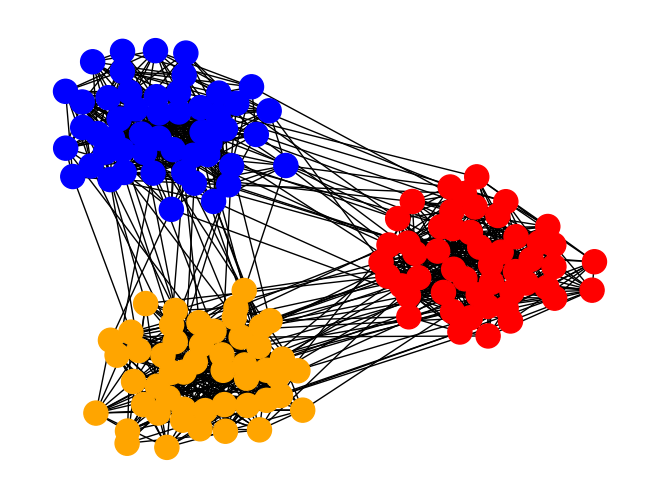

In [3]:
RG = rg.RandomCommunitiesGraph()
G, actual_com = RG.generate_random_com_graph(N=150,
                                            n_groups=3,
                                            p_in_group=0.3,
                                            p_out_group=0.01,
                                            seed=r_seed)

RG.draw(seed=r_seed)

##### The modularity of weighted threshold algorithm 

In [4]:
CNC = cnc.CommonNeighborCommunity(G, actual_com)
CNC.findAllCommunities(thres=0.1, weighted=True)
CNC.getModularity()

0.5933738665251529

In [5]:
CNC.accuracy_per_actual

{0: 1.0, 1: 1.0, 2: 1.0}

##### The modularity of Louvain algorithm (Greedy Modularity Maximization) 

In [6]:
partition = nx.algorithms.community.louvain_communities(G)
nx.algorithms.community.modularity(G, partition)

0.5933738665251529

In [7]:
communities = CNC.getActualCommunities()
getMaxIntersectAccuracy(communities=communities, predictions=partition)

{0: 1.0, 1: 1.0, 2: 1.0}

We can see for big gap graphs, we got the same modularities

## Small Gap Graph

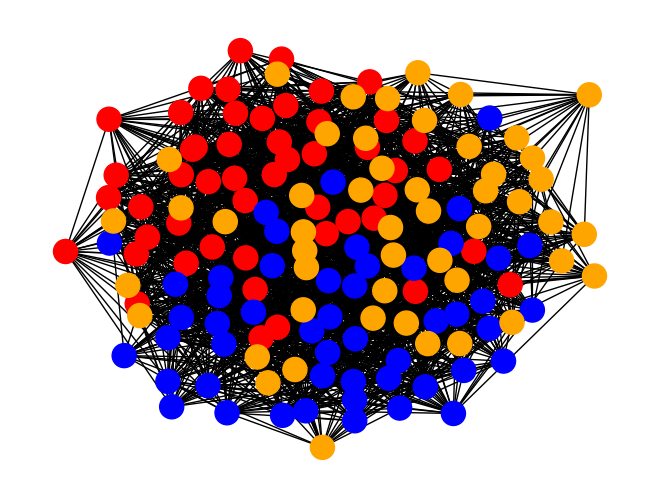

In [8]:
RG = rg.RandomCommunitiesGraph()
G, actual_com = RG.generate_random_com_graph(N=150,
                                            n_groups=3,
                                            p_in_group=0.3,
                                            p_out_group=0.15,
                                            seed=r_seed)

RG.draw(seed=r_seed)

In [9]:
CNC = cnc.CommonNeighborCommunity(G, actual_com)
CNC.findAllCommunities(thres=0.1, weighted=True)
CNC.getModularity()

0.0

In [10]:
CNC.accuracy_per_actual

{0: 1.0, 1: 0.0, 2: 0.0}

In [11]:
partition = nx.algorithms.community.louvain_communities(G)
nx.algorithms.community.modularity(G, partition)

0.17035039909558314

In [12]:
communities = CNC.getActualCommunities()
getMaxIntersectAccuracy(communities=communities, predictions=partition)

{0: 0.7, 1: 0.84, 2: 0.88}

## EU Emails

In [14]:
G = read.createGraph("../data/raw/email_data.txt")
print("Number of nodes:", G.order())
print("Number of edges:", G.size())

actual_com = read.createActualCommunity("../data/raw/email_communities.txt")
print("Number of nodes get community:", len(actual_com))

G.remove_edges_from(nx.selfloop_edges(G))
print("Number of nodes:", G.order())
print("Number of edges:", G.size())

Number of nodes: 1005
Number of edges: 16706
Number of nodes get community: 1005
Number of nodes: 1005
Number of edges: 16064


In [19]:
CNC = cnc.CommonNeighborCommunity(G, actual_com)
CNC.findAllCommunities(thres=0.28, weighted=True)
print("Accuracy of Weighted Threshold:", CNC.getAvgAccuracy())
print("Modularity of Weighted Threshold:", CNC.getModularity())

Accuracy of Weighted Threshold: 0.24966366339127521
Modularity of Weighted Threshold: 0.12639302879368883


In [29]:
partition = nx.algorithms.community.louvain_communities(G)
communities = CNC.getActualCommunities()

print("Accuracy of modularity algorithm:", np.mean(list(getMaxIntersectAccuracy(communities=communities, predictions=partition).values())))
print("Modularity of modularity algorithm:", nx.algorithms.community.modularity(G, partition))

Accuracy of modularity algorithm: 0.8638400914192884
Modularity of modularity algorithm: 0.41499745656008935
